In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc
import linecache

## 物理定数

pi           = np.pi                    # PI
k_b          = sc.k*1e7                 # Boltzmann constant in erg/K
m_p          = sc.proton_mass*1e3       # proton mass in g
Grav         = sc.G*1e3                 # gravitational constant in cm^3 g^-1 s^-2
AU           = sc.au*1e2                # astronomical unit in cm
yr         = sc.Julian_year             # year in s
mu           = 2.34e0                    # mean molecular mass in proton masses
M_sun        = 1.9891e+33               # mass of the sun in g
R_sun        = 69550800000.0            # radius of the sun in cm
L_sun        = 3.828000000000000255e+33
sigmaSB      = 5.670500000000000003e-05

In [2]:
## data ID
ID_RADIUS = 0   # radius
ID_SIGMAG = 1   # gas surface density
ID_TEMP   = 2   # temperature
ID_CS     = 3   # sound speed
ID_OMEGA  = 4   # angular velocity
ID_HG     = 5   # gas scale height
ID_QT     = 6   # Toomre's Q parameter
ID_MR     = 7   # enclosed mass
ID_ALPHA  = 8   # alpha parameter
ID_VGR    = 9  # gas radial velocity
ID_VGRVIS = 10  # viscous velocity
ID_VGRETA = 11  # gas pressure gradient velocity
ID_VGRSRC = 12  # velocty by source term
ID_CVGVIS = 13  # gas viscous velocity coefficient by gas and dust interaction
ID_CVGETA = 14  # gas pressure gradient velocity coefficient by gas and dust interaction
ID_SGINF  = 15  # infall rate per area
ID_SGWIND = 16  # wind rate per area
ID_SIGMAD = 17  # dust surface density
ID_VDR    = 18  # dust radial velocity
ID_CVDVIS = 19  # dust viscous velocity coefficient by gas and dust interaction
ID_CVDETA = 20  # gas pressure gradient velocity coefficient by gas and dust interaction
ID_ST     = 21
ID_MAX    = 22  # number of data ID

def read_input(filename):
    file = open(filename, 'r', encoding='UTF-8')
    d = file.readlines()
    nlen = len(d)
    input_prams = {}
    for i in range(nlen):
        line = d[i].split()
        if len(line) == 0:
            continue
        if (line[0] == '\n') or (line[0] == '#'):
            continue
        input_prams[line[0]] = line[2]
    return input_prams
        

def read_data(filename, nr):
    with open(filename) as f:
        data = np.fromfile(f, dtype=float)
        time = data[0]
        data = data[16:].reshape([ID_MAX, nr])
    return time, data

def read_grid(filename):
    rcen = np.array([float(i) for i in linecache.getline(gridfile, 2).split()])
    rbnd = np.array([float(i) for i in linecache.getline(gridfile, 3).split()])
    rvol = np.array([float(i) for i in linecache.getline(gridfile, 4).split()])
    linecache.clearcache()
    return rcen, rbnd, rvol

In [29]:
dir_name = "../output/St1em2/"
dir_name = "/media/kawasaki/ab3d792b-e7b6-4657-bcb1-02d03f3dfef6/disk_evolution_TM2018_2/a3cm/"
inputfile = dir_name + "input"

input_params = read_input(inputfile)
nr = int(input_params['nr'])

logfile = dir_name + "log"

plot_time = [1.5e5, 1.9e5, 2.3e5, 2.6e5]
# plot_time = [2.7e5, 6.0e5, 7.7e5, 1.27e6]
plot_count = []

log_data = np.loadtxt(logfile, dtype=float).T
count = log_data[0]
time  = log_data[1]
ndata = len(count)
time_index = 0
for i in range(ndata):
    if plot_time[time_index] <= (time[i]/yr):
        plot_count.append(int(count[i]))
        time_index += 1
        if (time_index == len(plot_time)):
            break
            
print(plot_count)

[18609, 31958, 45294, 55296]


In [30]:
nc = float(input_params['n_center'])
rhoc = mu*m_p * nc
tff = np.sqrt(3.0*np.pi/(32.0*Grav*rhoc))
print("{:e}".format(tff/yr))

6.656585e+04


In [31]:
gridfile = dir_name + "grid"
rcen, rbnd , rvol = read_grid(gridfile)

# dr = rcen[1:] - rcen[:-1]
# rdr = dr[1:] / dr[:-1]
# # print(rdr)

In [32]:
file1 = dir_name + "disk" + str(plot_count[0])
file2 = dir_name + "disk" + str(plot_count[1])
file3 = dir_name + "disk" + str(plot_count[2])
file4 = dir_name + "disk" + str(plot_count[3])

time1, data1 = read_data(file1, nr)
time1 = "{:.2e}".format(time1/yr) + "year"

time2, data2 = read_data(file2, nr)
time2 = "{:.2e}".format(time2/yr) + "year"

time3, data3 = read_data(file3, nr)
time3 = "{:.2e}".format(time3/yr) + "year"

time4, data4 = read_data(file4, nr)
time4 = "{:.2e}".format(time4/yr) + "year"

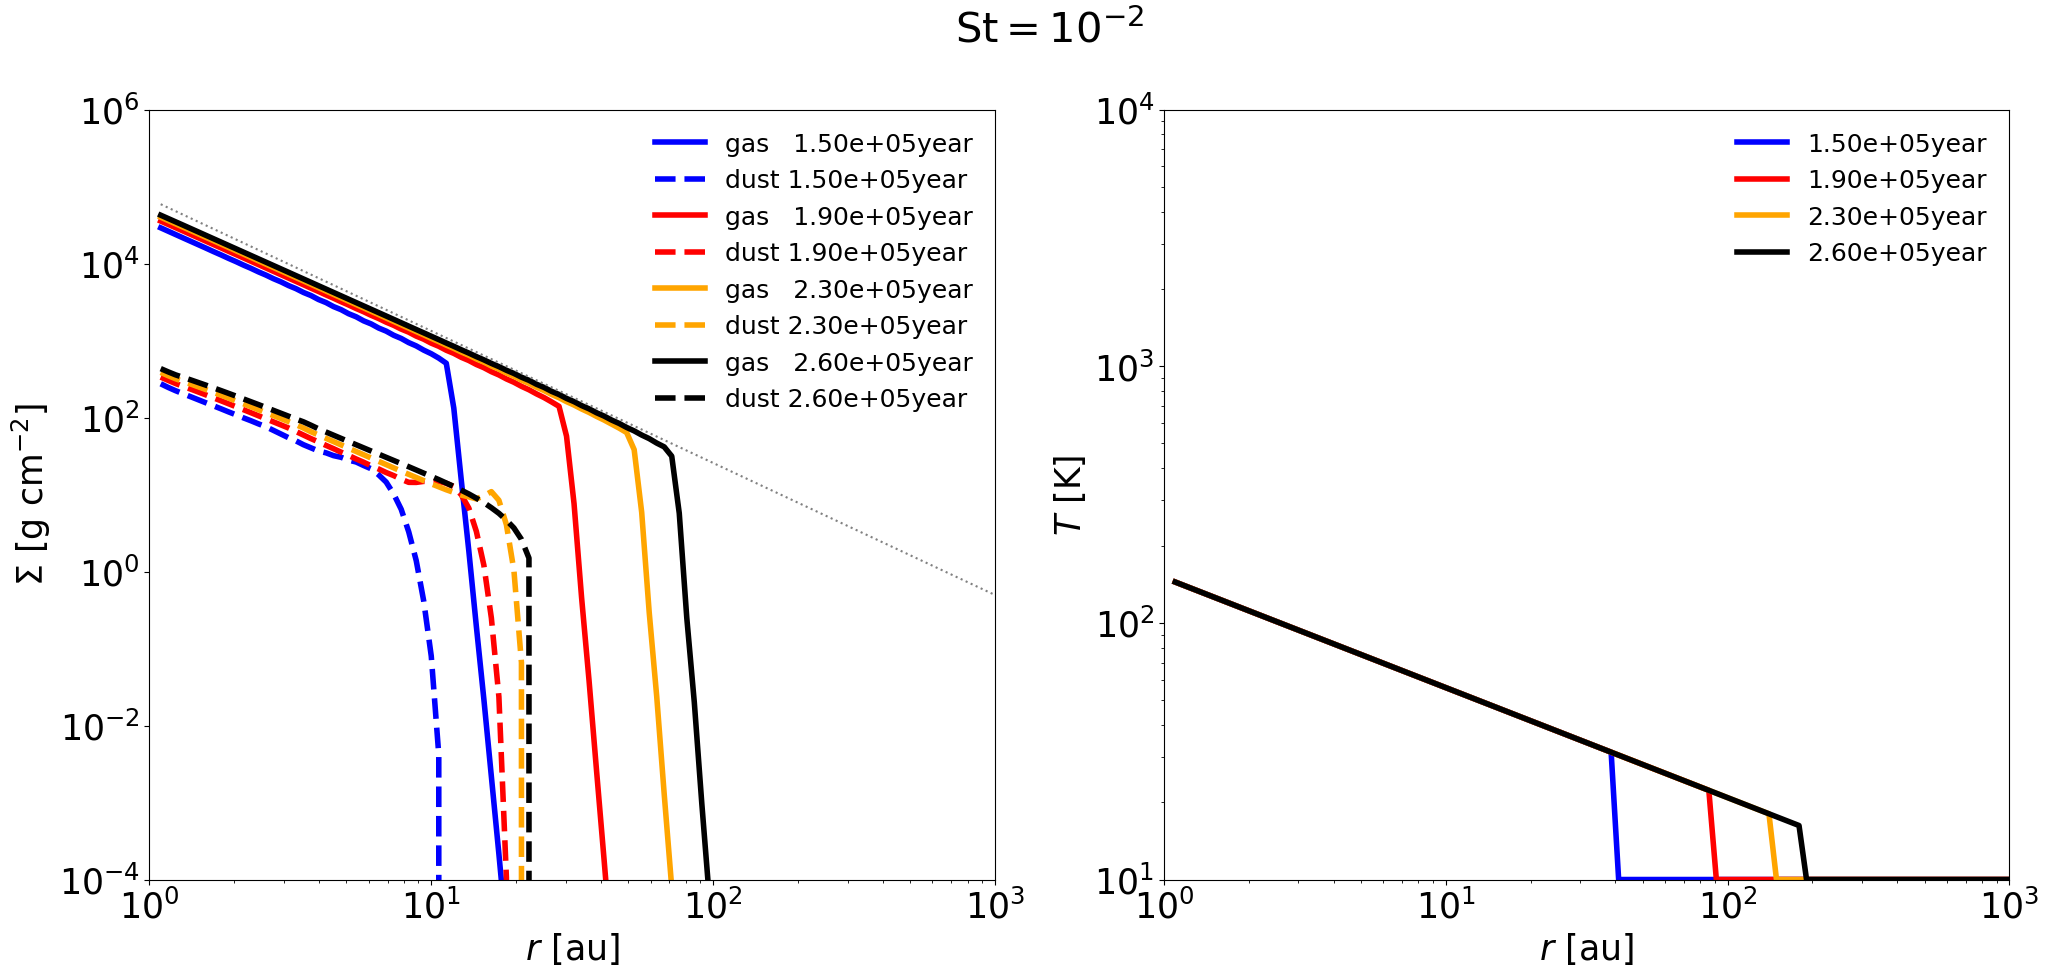

In [33]:
x = data1[ID_RADIUS] / AU

fontsize = 25

fig = plt.figure(figsize=(24, 10))
fig.suptitle(r"$\mathrm{St} = 10^{-2}$", fontsize=30)

ax1 = fig.add_subplot(1, 2, 1)
SQ = 6.9e4 * x**(-12/7)
lw = 4
ax1.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax1.set_ylabel(r"$\Sigma \ [\mathrm{g \ cm^{-2}}]$", fontsize=fontsize)
ax1.plot(x, data1[ID_SIGMAG], label="gas   "+time1, color="blue", lw=lw)
ax1.plot(x, data1[ID_SIGMAD], linestyle="dashed", label="dust "+time1, color="blue", lw=lw)

ax1.plot(x, data2[ID_SIGMAG], label="gas   "+time2, color="red", lw=lw)
ax1.plot(x, data2[ID_SIGMAD], linestyle="dashed", label="dust "+time2, color="red", lw=lw)

ax1.plot(x, data3[ID_SIGMAG], label="gas   "+time3, color="orange", lw=lw)
ax1.plot(x, data3[ID_SIGMAD], linestyle="dashed", label="dust "+time3, color="orange", lw=lw)

ax1.plot(x, data4[ID_SIGMAG], label="gas   "+time4, color="black", lw=lw)
ax1.plot(x, data4[ID_SIGMAD], linestyle="dashed", label="dust "+time4, color="black", lw=lw)

ax1.plot(x, SQ, linestyle="dotted", color="gray")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(1.0e-4, 1.0e6)
ax1.set_xlim(1.0e0, 1.0e3)
ax1.tick_params(labelsize=fontsize)
ax1.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax2.set_ylabel(r"$T \ [\mathrm{K}]$", fontsize=fontsize)
ax2.plot(x, data1[ID_TEMP], label=time1, color="blue", lw=lw)
ax2.plot(x, data2[ID_TEMP], label=time2, color="red", lw=lw)
ax2.plot(x, data3[ID_TEMP], label=time3, color="orange", lw=lw)
ax2.plot(x, data4[ID_TEMP], label=time4, color="black", lw=lw)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1.0e1, 1.0e4)
ax2.set_xlim(1.0e0, 1.0e3)
ax2.tick_params(labelsize=fontsize)
ax2.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

plt.show()

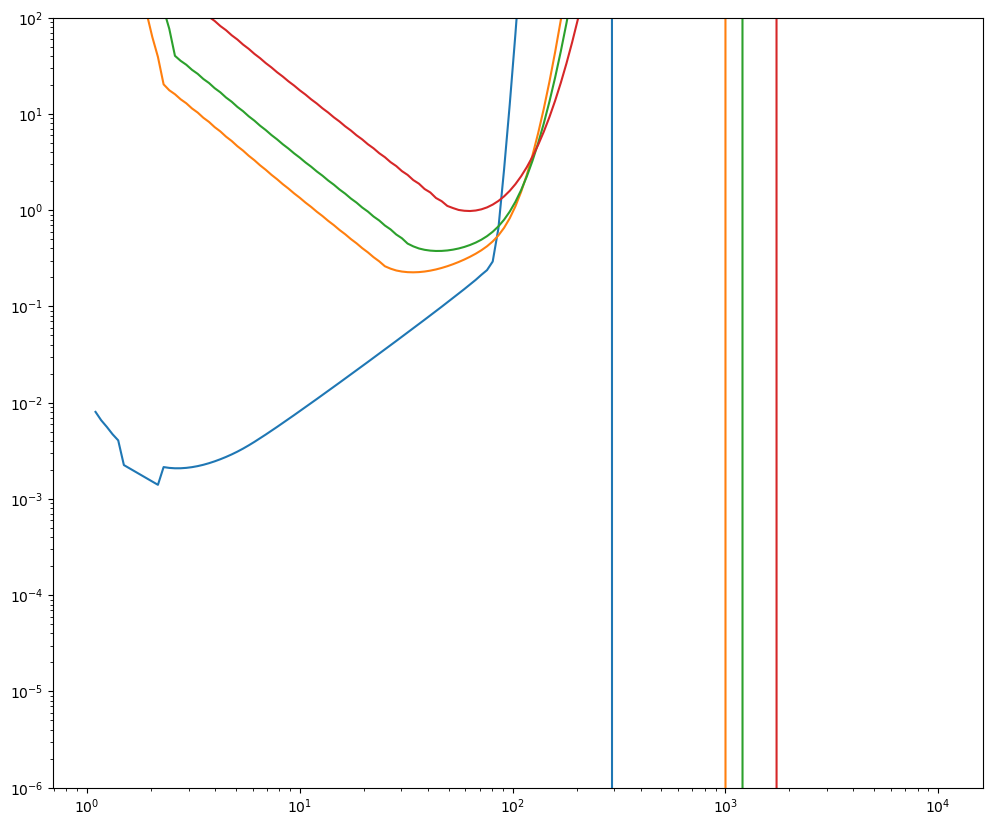

In [28]:
plt.figure(figsize=(12, 10))
plt.plot(x, data1[ID_ST])
plt.plot(x, data2[ID_ST])
plt.plot(x, data3[ID_ST])
plt.plot(x, data4[ID_ST])
plt.xscale("log")
plt.yscale("log")
plt.ylim(1.0e-6, 1.0e2)
plt.show()

In [66]:
nc = (1.0e-18/(mu*m_p))
print("{:e}".format(nc))
Oc = 0.3 * 1e5 / 3.085677e18
print("{:e}".format(Oc))

2.554973e+05
9.722340e-15


/tmp/ipykernel_821821/1469949624.py:2: RuntimeWarning: invalid value encountered in divide
  R1 = np.where(data1[ID_SIGMAG] > 1e-15, data1[ID_SIGMAD]/ data1[ID_SIGMAG], np.nan)
/tmp/ipykernel_821821/1469949624.py:3: RuntimeWarning: invalid value encountered in divide
  R2 = np.where(data2[ID_SIGMAG] > 1e-15, data2[ID_SIGMAD]/ data2[ID_SIGMAG], np.nan)
/tmp/ipykernel_821821/1469949624.py:4: RuntimeWarning: invalid value encountered in divide
  R3 = np.where(data3[ID_SIGMAG] > 1e-15, data3[ID_SIGMAD]/ data3[ID_SIGMAG], np.nan)
/tmp/ipykernel_821821/1469949624.py:5: RuntimeWarning: invalid value encountered in divide
  R4 = np.where(data4[ID_SIGMAG] > 1e-15, data4[ID_SIGMAD]/ data4[ID_SIGMAG], np.nan)
/tmp/ipykernel_821821/1469949624.py:9: RuntimeWarning: divide by zero encountered in divide
  R1mid = np.where(data1[ID_ALPHA] > 0.0, np.sqrt((data1[ID_ALPHA] + St)/data1[ID_ALPHA]), np.nan) * R1
/tmp/ipykernel_821821/1469949624.py:10: RuntimeWarning: divide by zero encountered in divide
  R

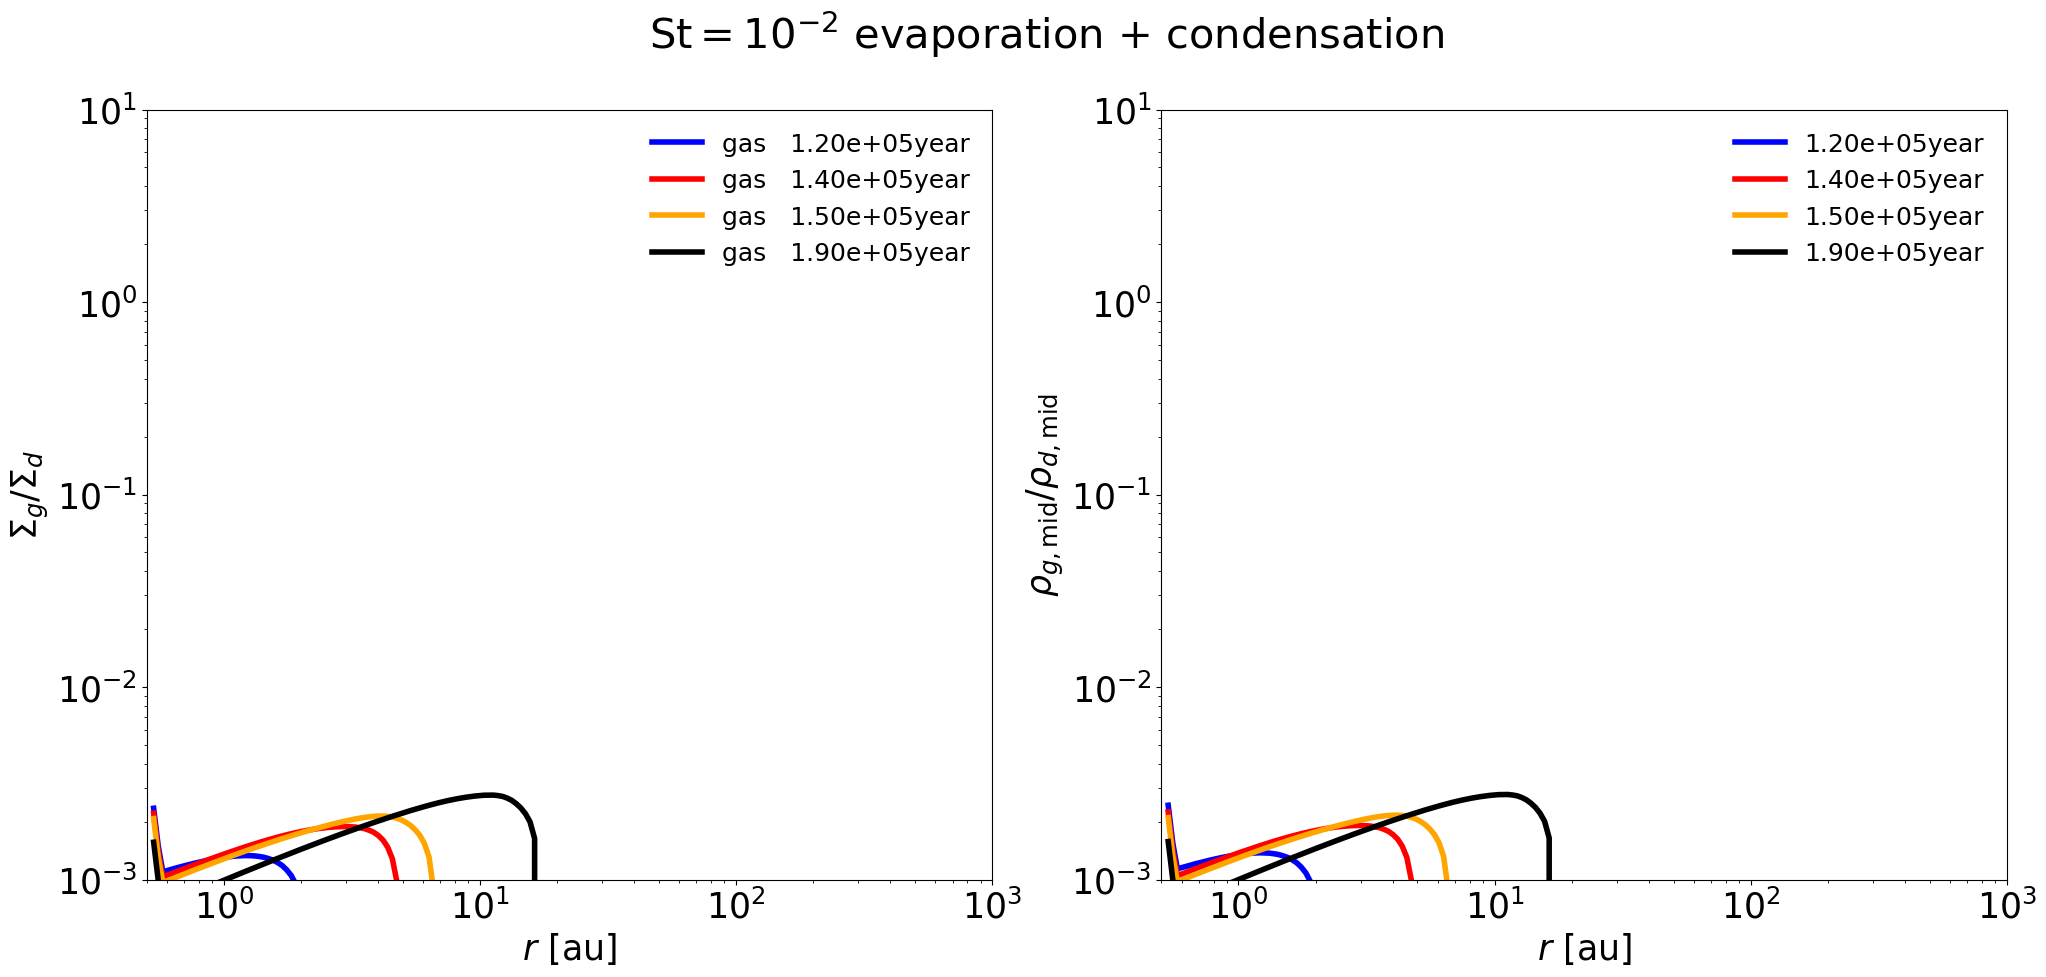

In [67]:
# ガスとダストの質量比
R1 = np.where(data1[ID_SIGMAG] > 1e-15, data1[ID_SIGMAD]/ data1[ID_SIGMAG], np.nan)
R2 = np.where(data2[ID_SIGMAG] > 1e-15, data2[ID_SIGMAD]/ data2[ID_SIGMAG], np.nan)
R3 = np.where(data3[ID_SIGMAG] > 1e-15, data3[ID_SIGMAD]/ data3[ID_SIGMAG], np.nan)
R4 = np.where(data4[ID_SIGMAG] > 1e-15, data4[ID_SIGMAD]/ data4[ID_SIGMAG], np.nan)

St = 1e-2
# midplaneでの質量比 Kanagawa et al. 2017 eq(36)
R1mid = np.where(data1[ID_ALPHA] > 0.0, np.sqrt((data1[ID_ALPHA] + St)/data1[ID_ALPHA]), np.nan) * R1
R2mid = np.where(data2[ID_ALPHA] > 0.0, np.sqrt((data2[ID_ALPHA] + St)/data2[ID_ALPHA]), np.nan) * R2
R3mid = np.where(data3[ID_ALPHA] > 0.0, np.sqrt((data3[ID_ALPHA] + St)/data3[ID_ALPHA]), np.nan) * R3
R4mid = np.where(data4[ID_ALPHA] > 0.0, np.sqrt((data4[ID_ALPHA] + St)/data4[ID_ALPHA]), np.nan) * R4

x = data1[ID_RADIUS] / AU

fontsize = 25

fig = plt.figure(figsize=(24, 10))
fig.suptitle(r"$\mathrm{St} = 10^{-2}$ evaporation + condensation", fontsize=30)

ax1 = fig.add_subplot(1, 2, 1)
SQ = 6.9e4 * x**(-12/7)
lw = 4
ax1.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax1.set_ylabel(r"$\Sigma_{g} / \Sigma_{d}$", fontsize=fontsize)
ax1.plot(x, R1, label="gas   "+time1, color="blue", lw=lw)
ax1.plot(x, R2, label="gas   "+time2, color="red", lw=lw)
ax1.plot(x, R3, label="gas   "+time3, color="orange", lw=lw)
ax1.plot(x, R4, label="gas   "+time4, color="black", lw=lw)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(1.0e-3, 1.0e1)
ax1.set_xlim(5.0e-1, 1.0e3)
ax1.tick_params(labelsize=fontsize)
ax1.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax2.set_ylabel(r"$\rho_{g, \mathrm{mid}} / \rho_{d, \mathrm{mid}}$", fontsize=fontsize)
ax2.plot(x, R1mid, label=time1, color="blue", lw=lw)
ax2.plot(x, R2mid, label=time2, color="red", lw=lw)
ax2.plot(x, R3mid, label=time3, color="orange", lw=lw)
ax2.plot(x, R4mid, label=time4, color="black", lw=lw)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(1.0e-3, 1.0e1)
ax2.set_xlim(5.0e-1, 1.0e3)
ax2.tick_params(labelsize=fontsize)
ax2.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

plt.show()

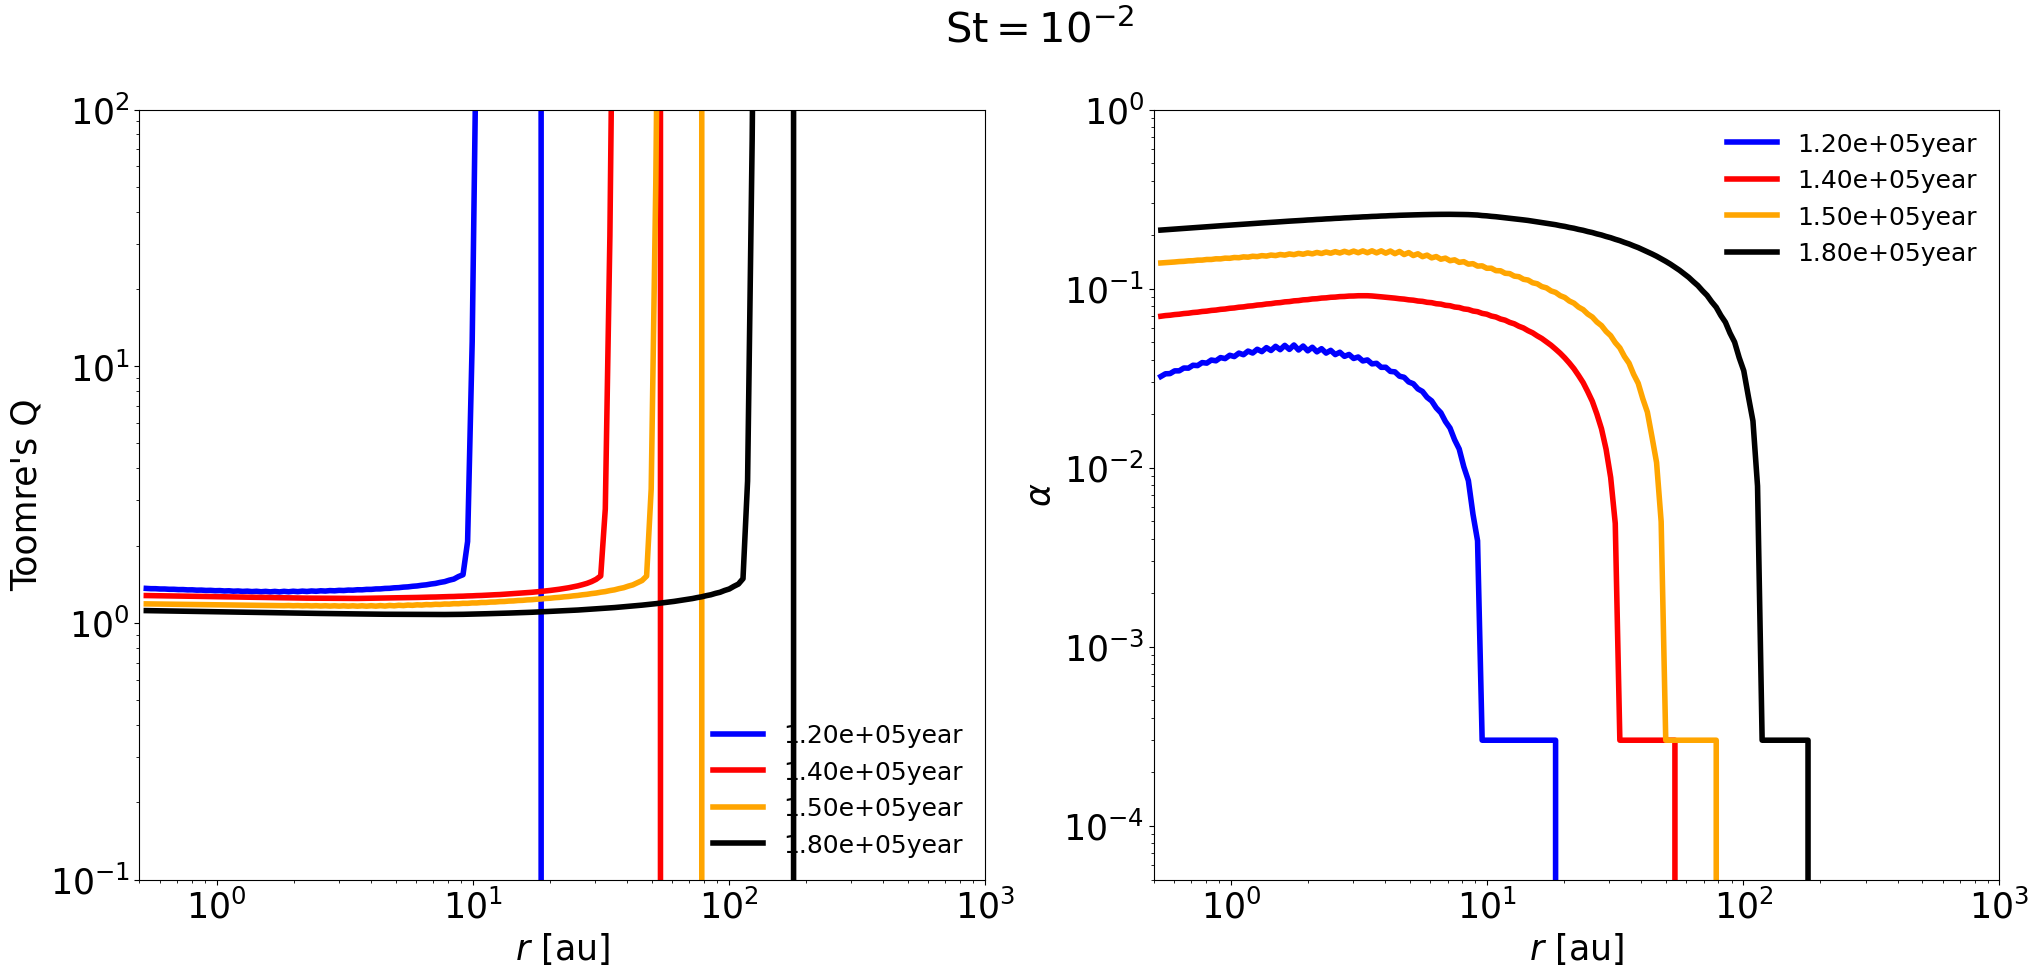

In [98]:
fig = plt.figure(figsize=(24, 10))
fig.suptitle(r"$\mathrm{St} = 10^{-2}$", fontsize=30)

ax1 = fig.add_subplot(1, 2, 1)
SQ = 6.9e4 * x**(-12/7)
lw = 4
ax1.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax1.set_ylabel(r"Toomre's Q", fontsize=fontsize)
ax1.plot(x, data1[ID_QT], label=time1, color="blue", lw=lw)
ax1.plot(x, data2[ID_QT], label=time2, color="red", lw=lw)
ax1.plot(x, data3[ID_QT], label=time3, color="orange", lw=lw)
ax1.plot(x, data4[ID_QT], label=time4, color="black", lw=lw)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_ylim(1.0e-1, 1.0e2)
ax1.set_xlim(5.0e-1, 1.0e3)
ax1.tick_params(labelsize=fontsize)
ax1.legend(fontsize=18, frameon=False, ncol=1, loc="lower right")

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_xlabel(r"$r \ [\mathrm{au}]$", fontsize= fontsize)
ax2.set_ylabel(r"$\alpha$", fontsize=fontsize)
ax2.plot(x, data1[ID_ALPHA], label=time1, color="blue", lw=lw)
ax2.plot(x, data2[ID_ALPHA], label=time2, color="red", lw=lw)
ax2.plot(x, data3[ID_ALPHA], label=time3, color="orange", lw=lw)
ax2.plot(x, data4[ID_ALPHA], label=time4, color="black", lw=lw)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_ylim(5.0e-5, 1.0)
ax2.set_xlim(5.0e-1, 1.0e3)
ax2.tick_params(labelsize=fontsize)
ax2.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")

plt.show()

/tmp/ipykernel_821821/3821124627.py:18: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


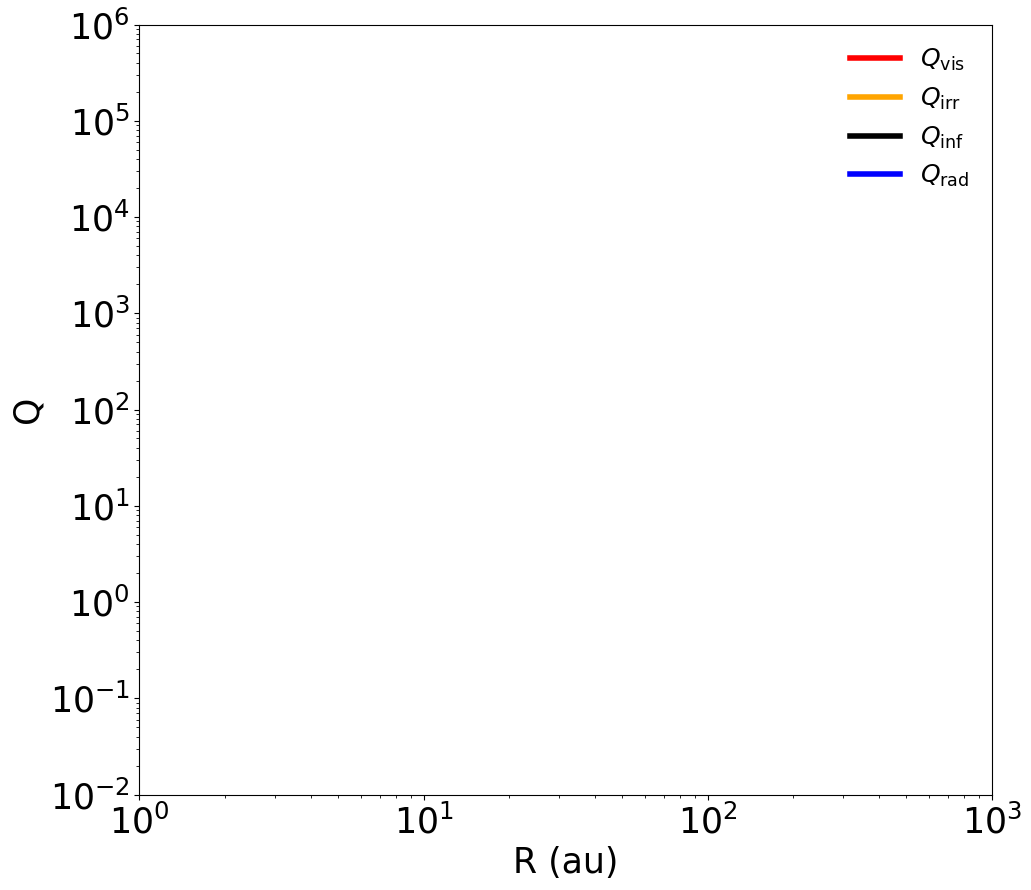

In [69]:
data = data4
time = time4

Qvis = data[ID_QVIS]
Qirr = data[ID_QIRR]
Qinf = data[ID_QINF]
Qrad = data[ID_QRAD]


plt.figure(figsize=(11, 10))
plt.xlabel("R (au)", fontsize= fontsize)
plt.ylabel("Q", fontsize=fontsize)
plt.plot(x, Qvis, label=r"$Q_{\mathrm{vis}}$", color="red", lw=lw)
plt.plot(x, Qirr, label=r"$Q_{\mathrm{irr}}$", color="orange", lw=lw)
plt.plot(x, Qinf, label=r"$Q_{\mathrm{inf}}$", color="black", lw=lw)
plt.plot(x, Qrad, label=r"$Q_{\mathrm{rad}}$", color="blue", lw=lw)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1.0e-2, 1.0e6)
plt.xlim(1.0e0, 1.0e3)
plt.tick_params(labelsize=fontsize)
plt.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")
plt.show()

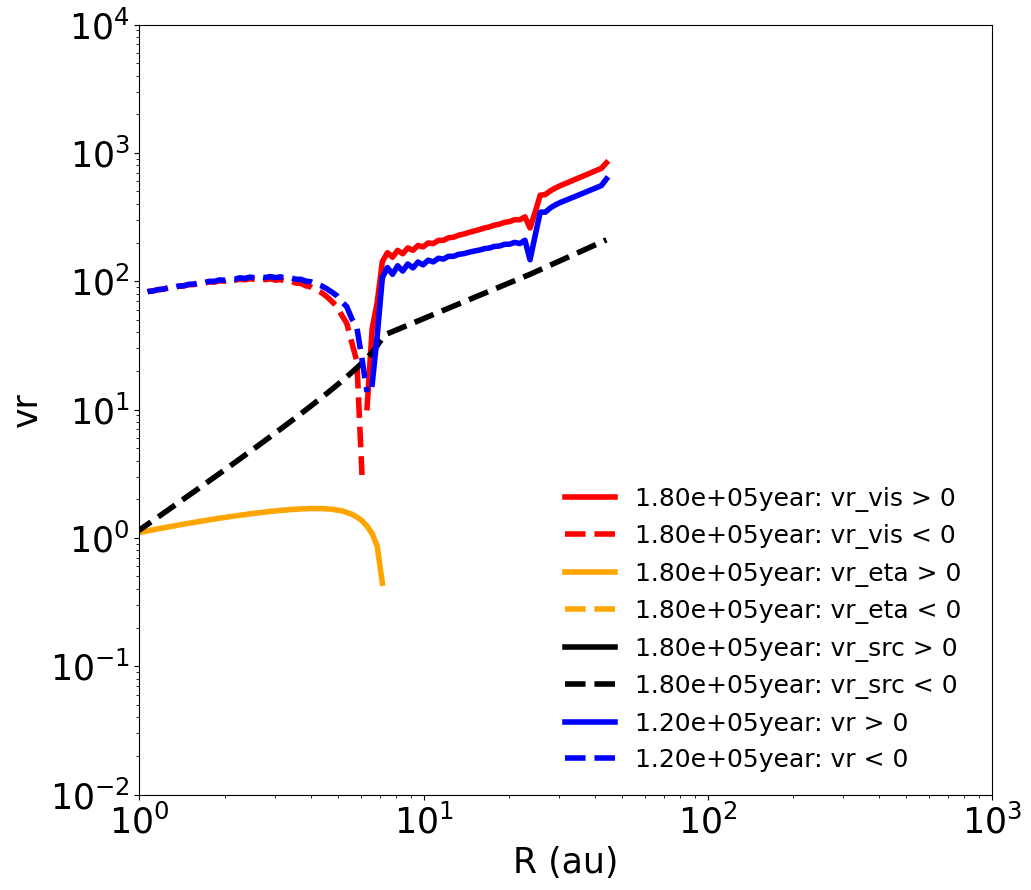

In [109]:
data = data4
time = time4

vgr = data[ID_VGR]
vgr_p1 = np.where(data[ID_VGR] > 0.0, data[ID_VGR], np.nan)
vgr_m1 = np.where(data[ID_VGR] < 0.0, data[ID_VGR], np.nan)

# vgr_vis_p1 = np.where(data2[ID_VGRVIS] > 0.0, data1[ID_VGRVIS], np.nan)
# vgr_vis_m1 = np.where(data2[ID_VGRVIS] < 0.0, data1[ID_VGRVIS], np.nan)
# vgr_vis = data[ID_CVGVIS] * data[ID_VGRVIS]
vgr_vis = data[ID_VGRVIS]
vgr_vis_p1 = np.where(vgr_vis > 0.0, vgr_vis, np.nan)
vgr_vis_m1 = np.where(vgr_vis < 0.0, vgr_vis, np.nan)

vgr_eta = data[ID_CVGETA] * data[ID_VGRETA]
vgr_eta_p1 = np.where(vgr_eta > 0.0, vgr_eta, np.nan)
vgr_eta_m1 = np.where(vgr_eta < 0.0, vgr_eta, np.nan)

vgr_src = data[ID_VGRSRC] 
vgr_src_p1 = np.where(vgr_src > 0.0, vgr_src, np.nan)
vgr_src_m1 = np.where(vgr_src < 0.0, vgr_src, np.nan)


plt.figure(figsize=(11, 10))
plt.xlabel("R (au)", fontsize= fontsize)
plt.ylabel("vr", fontsize=fontsize)
plt.plot(x, np.abs(vgr_vis_p1), label=time + ": vr_vis > 0", color="red", lw=lw)
plt.plot(x, np.abs(vgr_vis_m1), label=time + ": vr_vis < 0 ", color="red", lw=lw, linestyle="dashed")
plt.plot(x, np.abs(vgr_eta_p1), label=time + ": vr_eta > 0", color="orange", lw=lw)
plt.plot(x, np.abs(vgr_eta_m1), label=time + ": vr_eta < 0 ", color="orange", lw=lw, linestyle="dashed")
plt.plot(x, np.abs(vgr_src_p1), label=time + ": vr_src > 0", color="black", lw=lw)
plt.plot(x, np.abs(vgr_src_m1), label=time + ": vr_src < 0 ", color="black", lw=lw, linestyle="dashed")
plt.plot(x, np.abs(vgr_p1), label=time1 + ": vr > 0", color="blue", lw=lw)
plt.plot(x, np.abs(vgr_m1), label=time1 + ": vr < 0 ", color="blue", lw=lw, linestyle="dashed")
# plt.plot(x, np.abs(vgr), label=time1 + ": vr < 0 ", color="blue", lw=lw)
plt.xscale("log")
plt.yscale("log")
plt.ylim(1.0e-2, 1.0e4)
plt.xlim(1.0e0, 1.0e3)
plt.tick_params(labelsize=fontsize)
plt.legend(fontsize=18, frameon=False, ncol=1, loc="lower right")
plt.show()

In [102]:
print(vgr)

[ 4.83235681e-01 -2.93734080e-01  7.32042297e-01 -6.71834294e-02
  1.01646138e+00  2.05662695e-01  1.34987369e+00  5.32009798e-01
  1.73952312e+00  9.20119287e-01  2.19370018e+00  1.37946682e+00
  2.72189988e+00  1.92092601e+00  3.33500589e+00  2.55698252e+00
  4.04550590e+00  3.30198419e+00  4.86774425e+00  4.17243439e+00
  5.81821947e+00  5.18733734e+00  6.91593605e+00  6.36860614e+00
  8.18282224e+00  7.74154748e+00  9.64422871e+00  9.33544009e+00
  1.13295271e+01  1.11842296e+01  1.32728332e+01  1.33273682e+01
  1.55138858e+01  1.58108378e+01  1.80991259e+01  1.86884070e+01
  2.10830299e+01  2.20231896e+01  2.45297791e+01  2.58896014e+01
  2.85153693e+01  3.03758449e+01  3.31303202e+01  3.55871160e+01
  3.84832051e+01  4.16498109e+01  4.47053421e+01  4.87171622e+01
  5.19571664e+01  5.69769721e+01  6.04371196e+01  6.66625370e+01
  7.03944562e+01  7.80686299e+01  8.21484252e+01  9.15759161e+01
  9.61184312e+01  1.07690329e+02  1.12874461e+02  1.27111157e+02
  1.33228435e+02  1.50860

In [119]:
# vgr_sum = vgr_vis + vgr_eta + vgr_src
# for i in range(len(vgr_sum)):
#     print("{:e}".format(vgr_sum[i]), "{:e}".format(vgr_vis[i]), "{:e}".format(vgr_eta[i]))

5977


/tmp/ipykernel_821821/489934446.py:66: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax3.set_yscale("log")


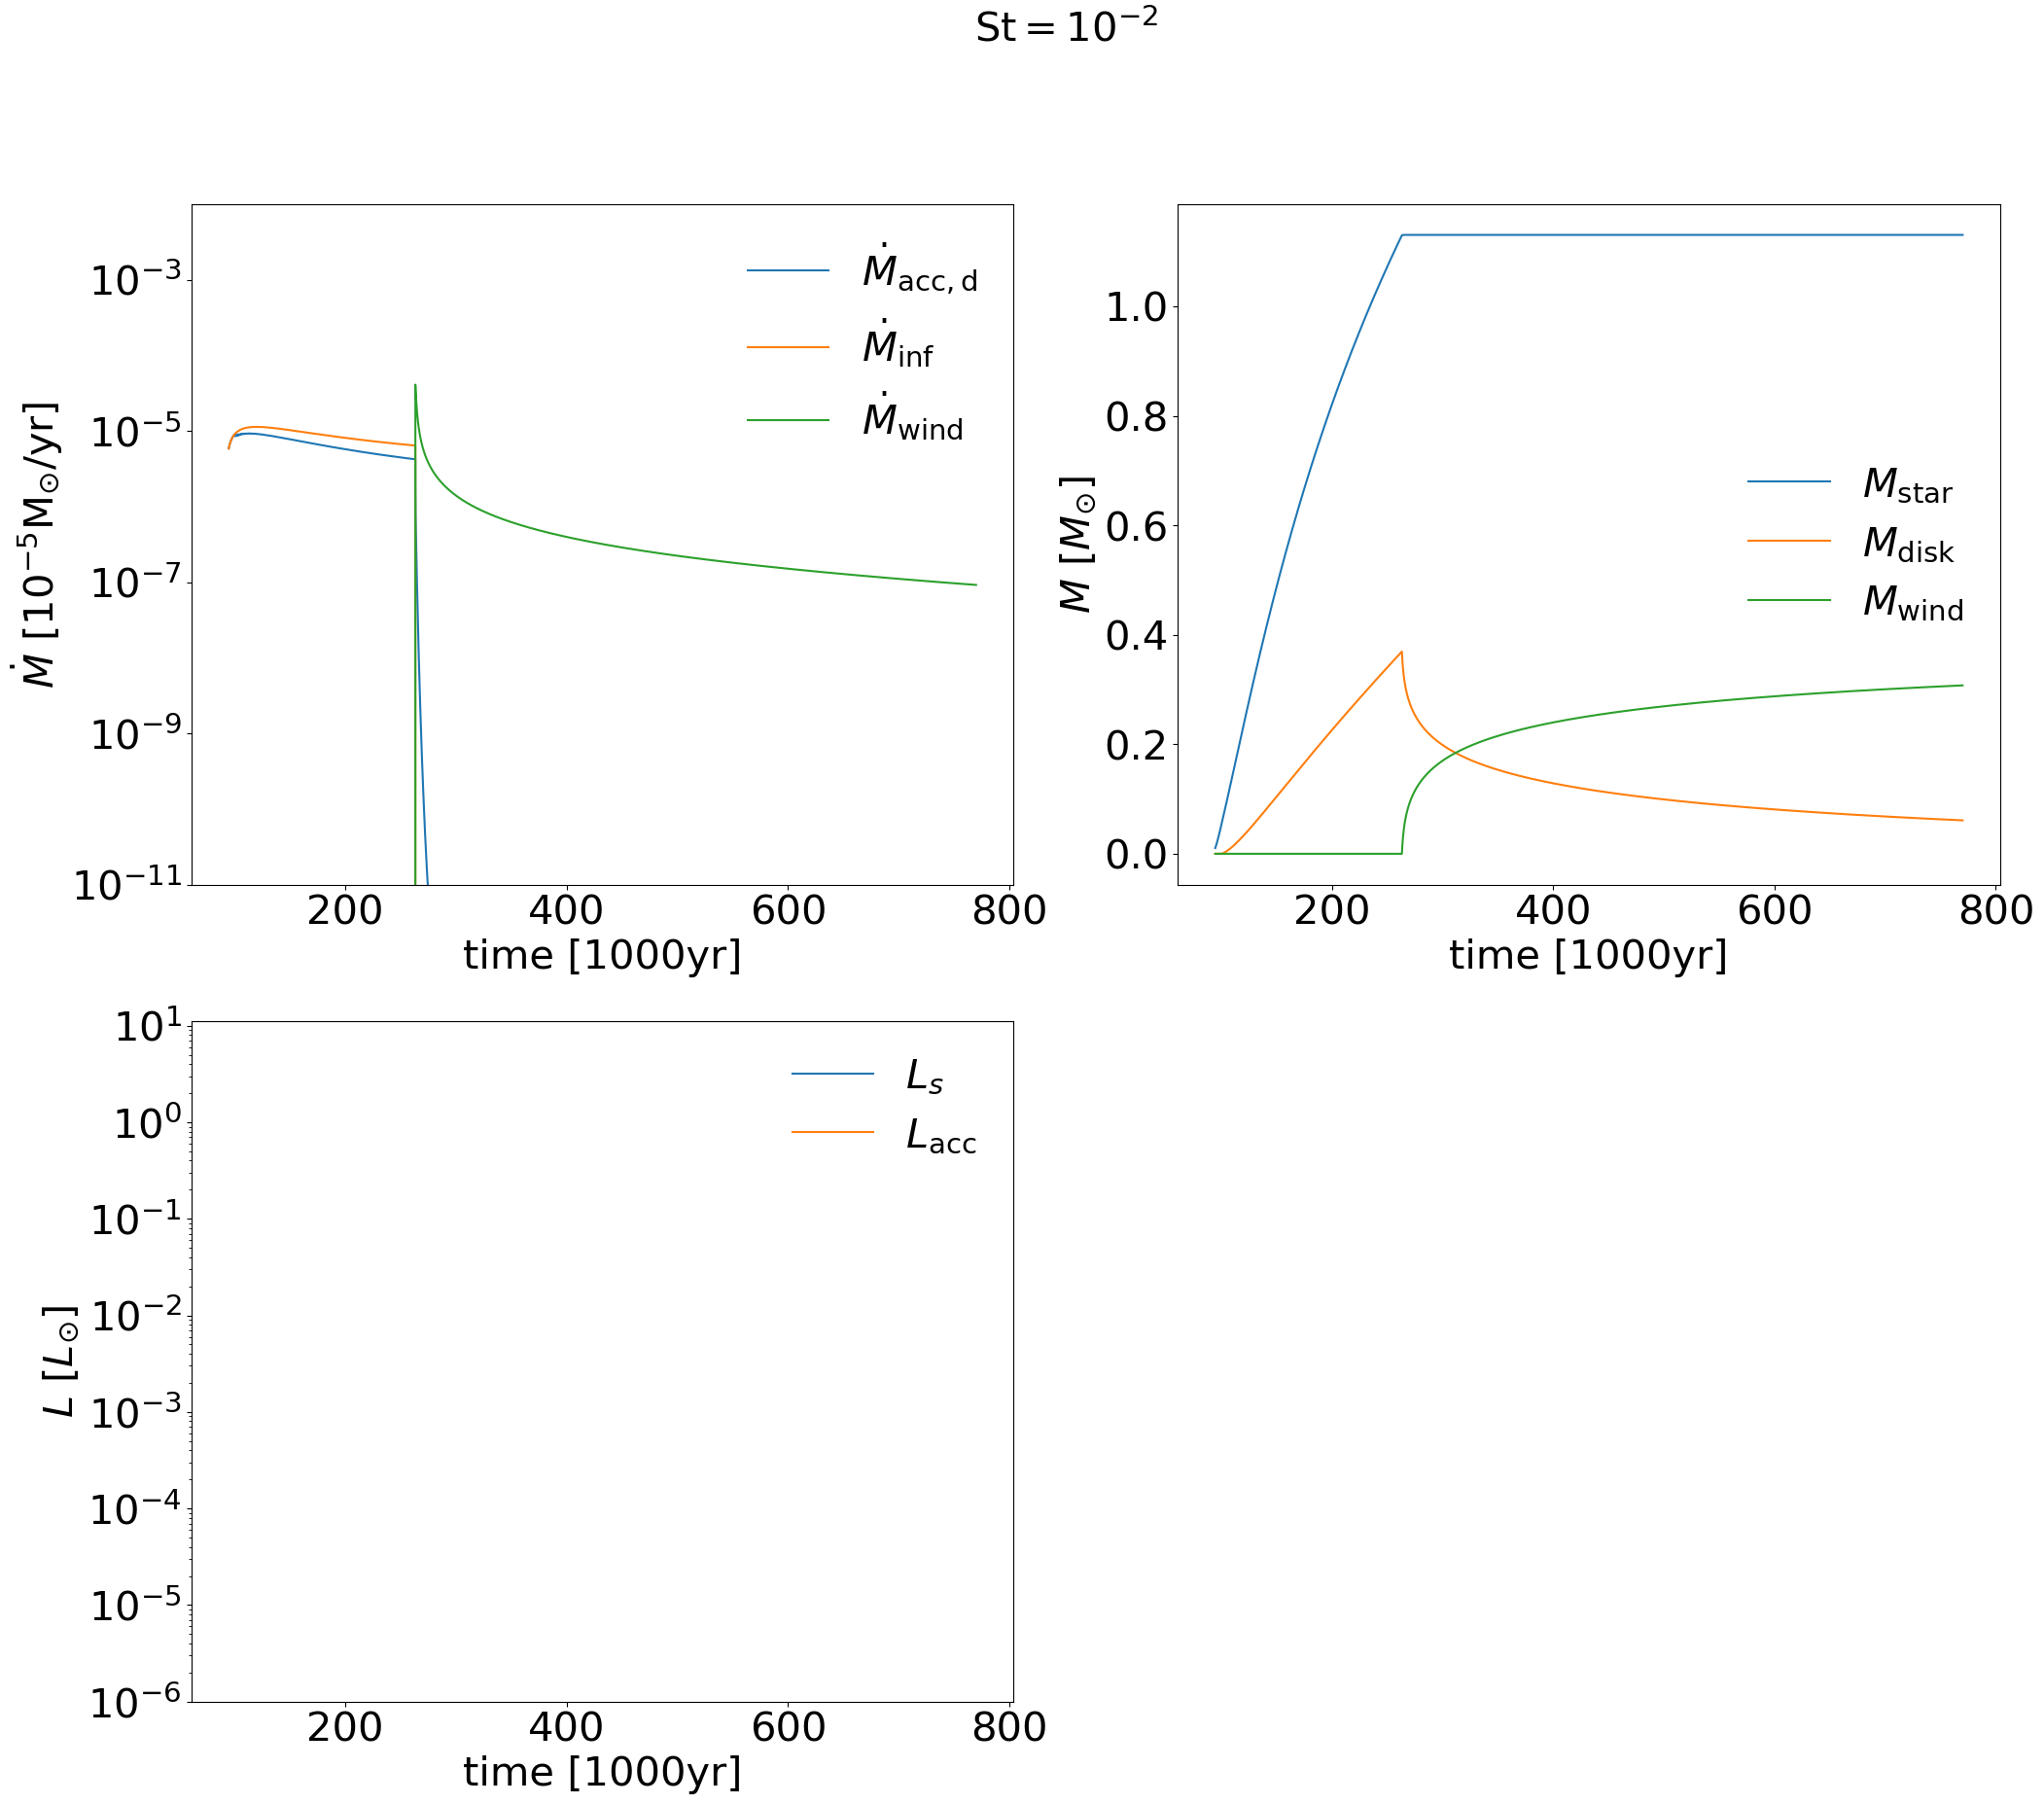

In [155]:
dir_name = "../output/St1em2/"
dir_name = "/media/kawasaki/ab3d792b-e7b6-4657-bcb1-02d03f3dfef6/disk_evolution_Takahashi_Muto_2018/St1em2_v5/"
# dir_name = "../output_back/St1em2_nc1e6_Omegac2em14/"
logfile = dir_name + "log"

log_data = np.loadtxt(logfile, dtype=float).T

count = log_data[0]
print(len(count))
time  = log_data[1]
mstar = log_data[2]
Ls = log_data[3]
Lacc = log_data[4]
gas_total_mass = log_data[5]
dust_total_mass = log_data[6]
total_mass = log_data[7]
mdot_acc_disk = log_data[8]
mdot_acc_env = log_data[9]
mdot_inf = log_data[10]
total_infall_mass = log_data[11]
mdot_wind = log_data[12]
mdot_wind_sweep = log_data[13]
total_wind_loss_mass = log_data[16]

mdot_acc = mdot_acc_disk + mdot_acc_env

fig = plt.figure(figsize=(24, 20))
plt.suptitle(r"$\mathrm{St} = 10^{-2}$", fontsize=30)


ax1 = fig.add_subplot(2, 2, 1)
# ax1.set_title(r"$\mathrm{St} = 10^{-3}$", fontsize=30)
# ax1.plot(time/1000/yr, mdot_acc_disk*yr/M_sun, label=r"$\dot{M}_{\mathrm{acc, d}}$")
# ax1.plot(time/1000/yr, mdot_acc_env*yr/M_sun, label=r"$\dot{M}_{\mathrm{acc, e}}$")
ax1.plot(time/1000/yr, mdot_acc*yr/M_sun, label=r"$\dot{M}_{\mathrm{acc, d}}$")
ax1.plot(time/1000/yr, mdot_inf*yr/M_sun, label=r"$\dot{M}_{\mathrm{inf}}$")
ax1.plot(time/1000/yr, mdot_wind*yr/M_sun, label=r"$\dot{M}_{\mathrm{wind}}$")
# ax1.set_ylim(0.0, 4.0)
ax1.set_ylim(1.0e-11, 1.0e-2)
ax1.set_yscale("log")
# ax1.set_xlim(160, 170)
# ax1.set_xlim(80, 200)
ax1.set_xlabel("time [1000yr]", fontsize=30)
ax1.set_ylabel(r"$\dot{M} \ [10^{-5} \mathrm{M_{\odot} / yr}]$", fontsize=30)
ax1.tick_params(labelsize=30)
ax1.legend(fontsize=30, frameon=False)


ax2 = fig.add_subplot(2, 2, 2)
# ax2.set_title(r"$\mathrm{St} = 10^{-2}$", fontsize=30)
ax2.plot(time/1000/yr, mstar/M_sun, label=r"$M_{\mathrm{star}}$")
ax2.plot(time/1000/yr, (gas_total_mass + dust_total_mass)/M_sun, label=r"$M_{\mathrm{disk}}$")
ax2.plot(time/1000/yr, (total_wind_loss_mass)/M_sun, label=r"$M_{\mathrm{wind}}$")
#ax2.set_ylim(0.0, 4.0)
ax2.set_xlabel("time [1000yr]", fontsize=30)
ax2.set_ylabel(r"$M \ [M_{\odot}]$", fontsize=30)
ax2.tick_params(labelsize=30)
ax2.legend(fontsize=30, frameon=False)


ax3 = fig.add_subplot(2, 2, 3)
# ax3.set_title(r"$\mathrm{St} = 10^{-1}$", fontsize=30)
ax3.plot(time/1000/yr, Ls/L_sun, label=r"$L_{s}$")
ax3.plot(time/1000/yr, Lacc/L_sun, label=r"$L_{\mathrm{acc}}$")
#ax3.set_ylim(0.0, 4.0)
ax3.set_yscale("log")
ax3.set_ylim(1e-6)
ax3.set_xlabel("time [1000yr]", fontsize=30)
ax3.set_ylabel(r"$L \ [L_{\odot}]$", fontsize=30)
ax3.tick_params(labelsize=30)
ax3.legend(fontsize=30, frameon=False)


# ax4 = fig.add_subplot(2, 2, 4)
# ax4.set_title(r"$\mathrm{St} = 1$", fontsize=30)
# ax4.plot(time/1000/yr, mdot_acc*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{acc}}$")
# ax4.plot(time/1000/yr, mdot_inf*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{inf}}$")
# ax4.set_ylim(0.0, 4.0)
# ax4.set_xlabel("time [1000yr]", fontsize=30)
# ax4.set_ylabel(r"$\dot{M} \ [10^{-5} \mathrm{M_{\odot} / yr}]$", fontsize=30)
# ax4.tick_params(labelsize=30)
# ax4.legend(fontsize=30, frameon=False)

plt.show()

4275
4275
4275
4275


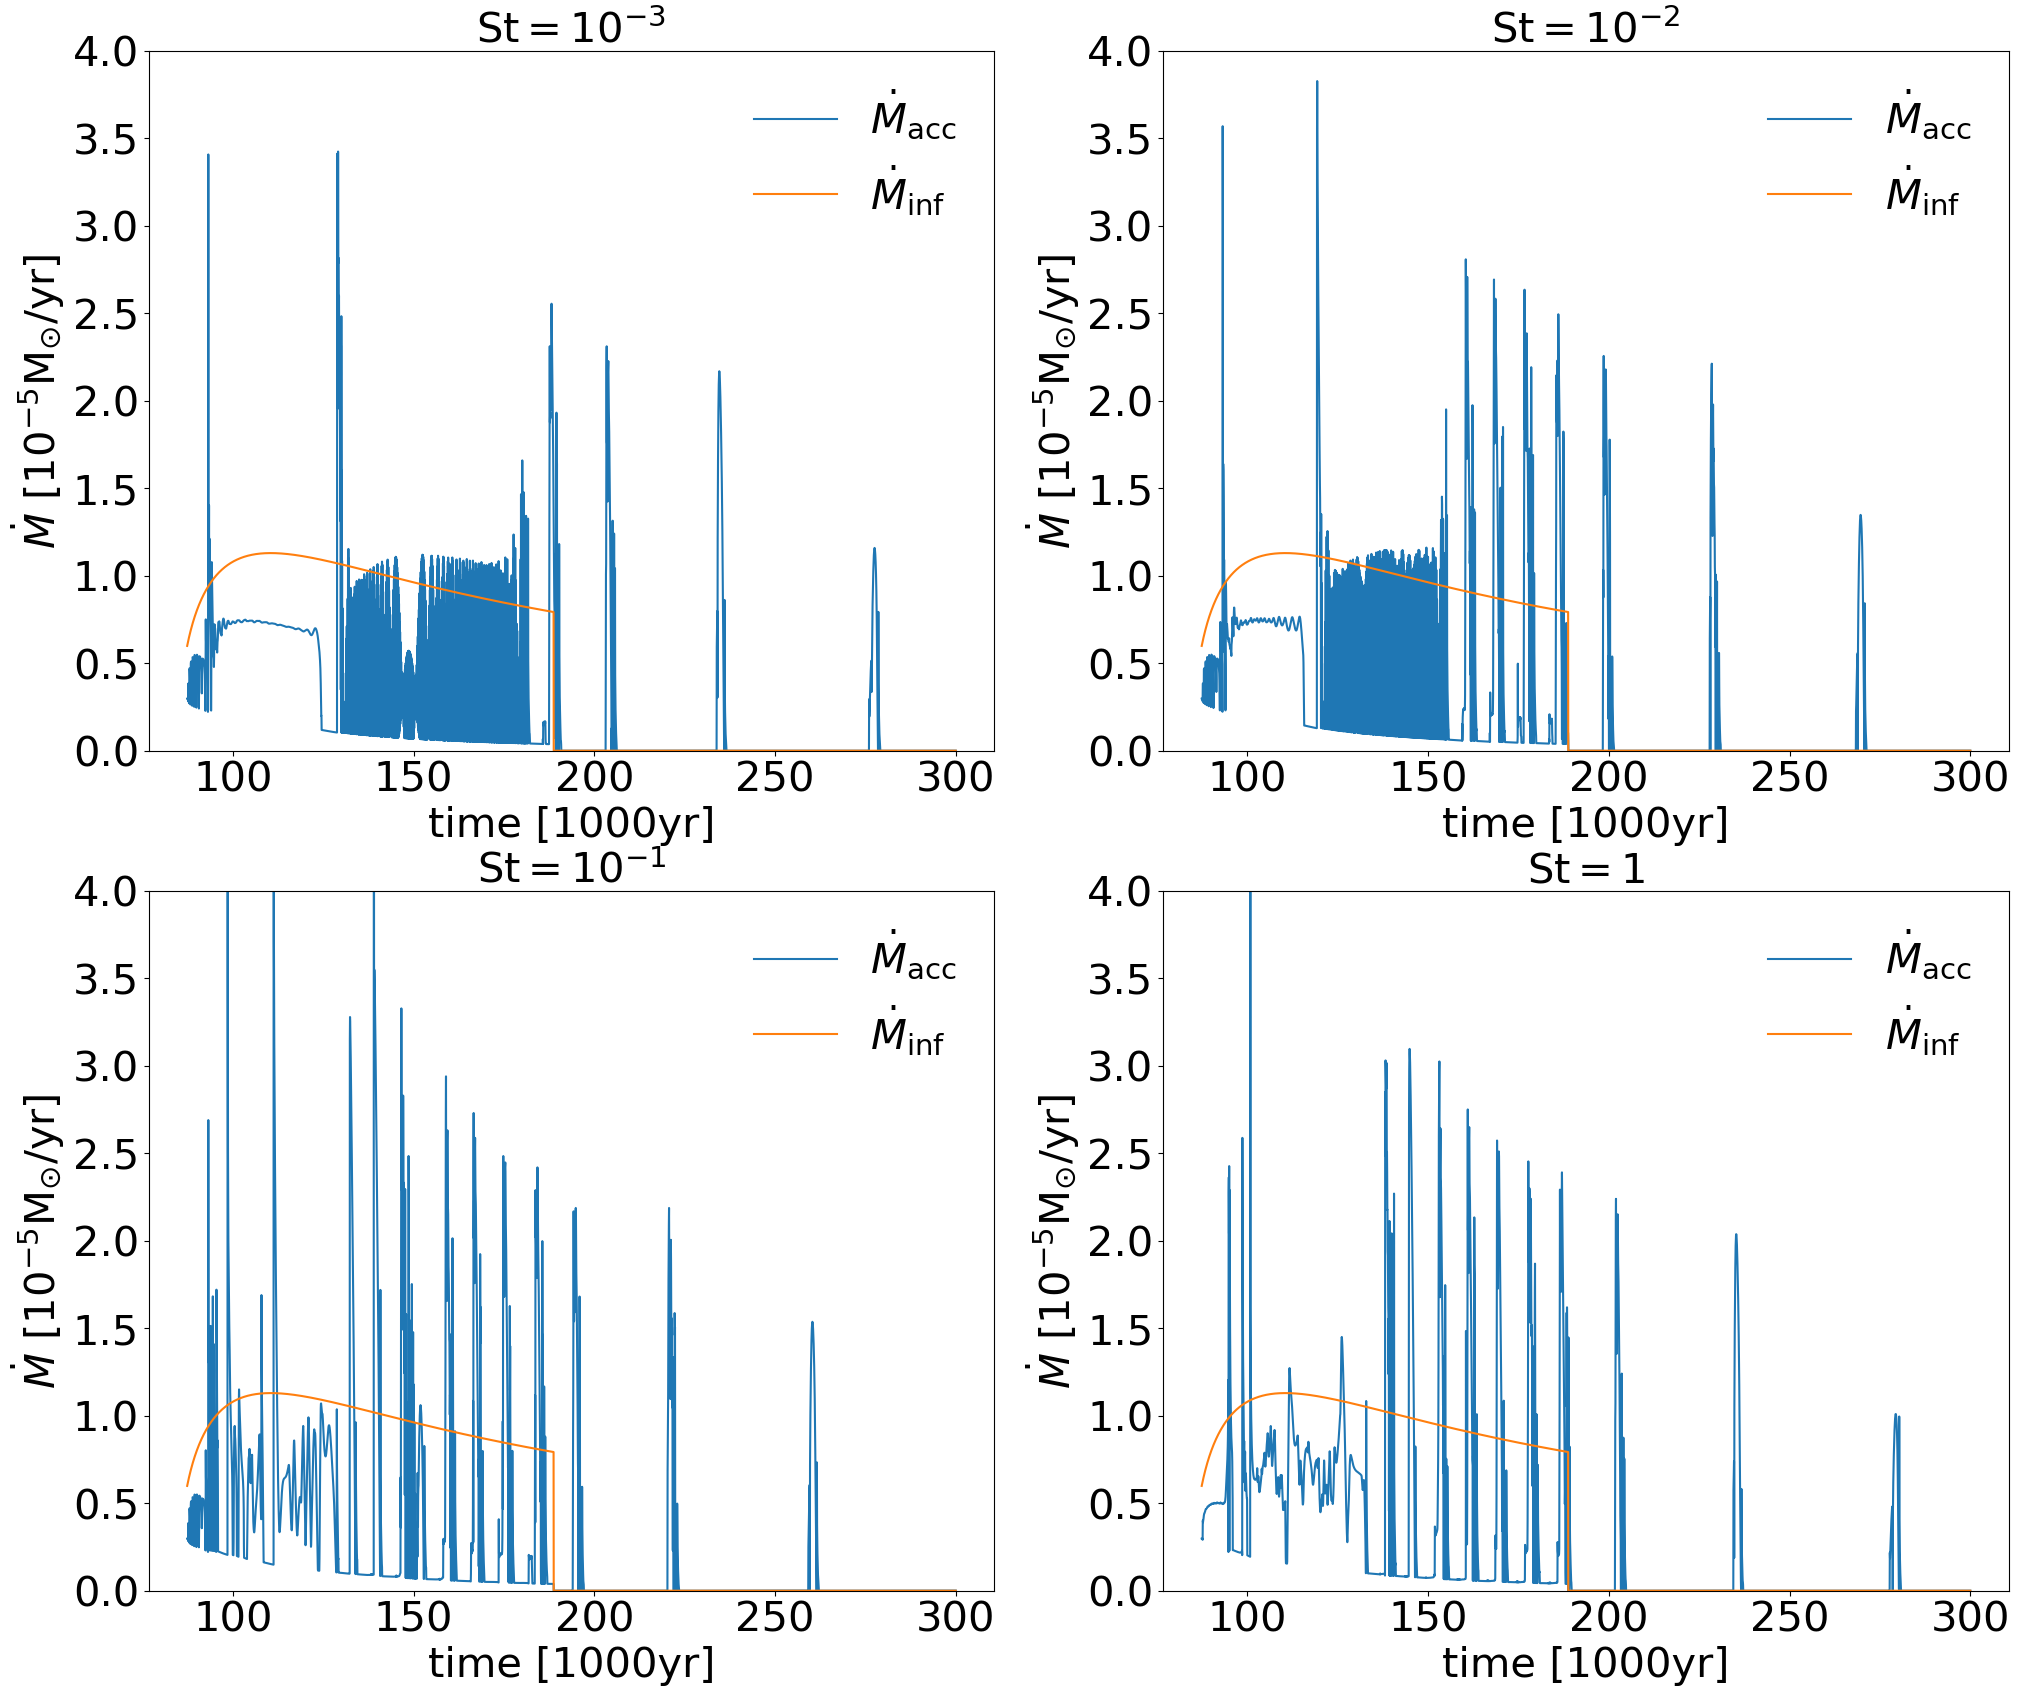

In [148]:
dirname = "../output/"

fig = plt.figure(figsize=(24, 20))

dir_name = dirname + "St1em3/"
logfile = dir_name + "log"
log_data = np.loadtxt(logfile, dtype=float).T
count = log_data[0]
print(len(count))
time  = log_data[1]
mdot_acc_disk = log_data[8]
mdot_acc_env = log_data[9]
mdot_inf = log_data[10]
mdot_acc = mdot_acc_disk + mdot_acc_env

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title(r"$\mathrm{St} = 10^{-3}$", fontsize=30)
ax1.plot(time/1000/yr, mdot_acc*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{acc}}$")
ax1.plot(time/1000/yr, mdot_inf*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{inf}}$")
ax1.set_ylim(0.0, 4.0)
ax1.set_xlabel("time [1000yr]", fontsize=30)
ax1.set_ylabel(r"$\dot{M} \ [10^{-5} \mathrm{M_{\odot} / yr}]$", fontsize=30)
ax1.tick_params(labelsize=30)
ax1.legend(fontsize=30, frameon=False)


dir_name = dirname + "St1em2/"
logfile = dir_name + "log"
log_data = np.loadtxt(logfile, dtype=float).T
count = log_data[0]
print(len(count))
time  = log_data[1]
mdot_acc_disk = log_data[8]
mdot_acc_env = log_data[9]
mdot_inf = log_data[10]
mdot_acc = mdot_acc_disk + mdot_acc_env

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title(r"$\mathrm{St} = 10^{-2}$", fontsize=30)
ax2.plot(time/1000/yr, mdot_acc*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{acc}}$")
ax2.plot(time/1000/yr, mdot_inf*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{inf}}$")
ax2.set_ylim(0.0, 4.0)
ax2.set_xlabel("time [1000yr]", fontsize=30)
ax2.set_ylabel(r"$\dot{M} \ [10^{-5} \mathrm{M_{\odot} / yr}]$", fontsize=30)
ax2.tick_params(labelsize=30)
ax2.legend(fontsize=30, frameon=False)


dir_name = dirname + "St1em1/"
logfile = dir_name + "log"
log_data = np.loadtxt(logfile, dtype=float).T
count = log_data[0]
print(len(count))
time  = log_data[1]
mdot_acc_disk = log_data[8]
mdot_acc_env = log_data[9]
mdot_inf = log_data[10]
mdot_acc = mdot_acc_disk + mdot_acc_env

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title(r"$\mathrm{St} = 10^{-1}$", fontsize=30)
ax3.plot(time/1000/yr, mdot_acc*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{acc}}$")
ax3.plot(time/1000/yr, mdot_inf*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{inf}}$")
ax3.set_ylim(0.0, 4.0)
ax3.set_xlabel("time [1000yr]", fontsize=30)
ax3.set_ylabel(r"$\dot{M} \ [10^{-5} \mathrm{M_{\odot} / yr}]$", fontsize=30)
ax3.tick_params(labelsize=30)
ax3.legend(fontsize=30, frameon=False)


dir_name = dirname + "St1em0/"
logfile = dir_name + "log"
log_data = np.loadtxt(logfile, dtype=float).T
count = log_data[0]
print(len(count))
time  = log_data[1]
mdot_acc_disk = log_data[8]
mdot_acc_env = log_data[9]
mdot_inf = log_data[10]
mdot_acc = mdot_acc_disk + mdot_acc_env

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title(r"$\mathrm{St} = 1$", fontsize=30)
ax4.plot(time/1000/yr, mdot_acc*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{acc}}$")
ax4.plot(time/1000/yr, mdot_inf*yr/M_sun/1e-5, label=r"$\dot{M}_{\mathrm{inf}}$")
ax4.set_ylim(0.0, 4.0)
ax4.set_xlabel("time [1000yr]", fontsize=30)
ax4.set_ylabel(r"$\dot{M} \ [10^{-5} \mathrm{M_{\odot} / yr}]$", fontsize=30)
ax4.tick_params(labelsize=30)
ax4.legend(fontsize=30, frameon=False)

plt.show()

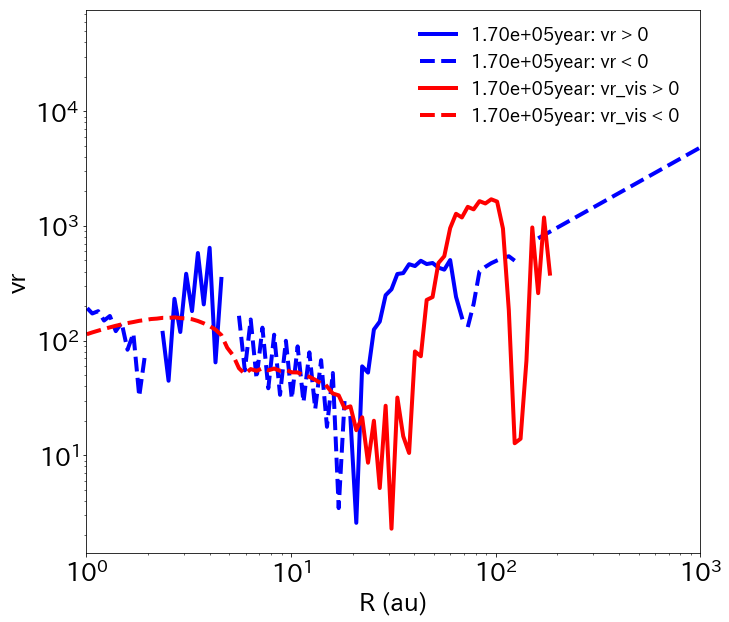

In [30]:
vgr_p = np.where(data3[ID_VGR] > 0.0, data1[ID_VGR], np.nan)
vgr_m = np.where(data3[ID_VGR] < 0.0, data1[ID_VGR], np.nan)

vgr_vis_p1 = np.where(data3[ID_VGRVIS] > 0.0, data1[ID_VGRVIS], np.nan)
vgr_vis_m1 = np.where(data3[ID_VGRVIS] < 0.0, data1[ID_VGRVIS], np.nan)


plt.figure(figsize=(11, 10))
plt.xlabel("R (au)", fontsize= fontsize)
plt.ylabel("vr", fontsize=fontsize)
plt.plot(x, np.abs(vgr_p1), label=time1 + ": vr > 0", color="blue", lw=lw)
plt.plot(x, np.abs(vgr_m1), label=time1 + ": vr < 0 ", color="blue", lw=lw, linestyle="dashed")
plt.plot(x, np.abs(vgr_vis_p1), label=time1 + ": vr_vis > 0", color="red", lw=lw)
plt.plot(x, np.abs(vgr_vis_m1), label=time1 + ": vr_vis < 0 ", color="red", lw=lw, linestyle="dashed")
# plt.plot(x, np.abs(data2[ID_VGR]), label="gas   "+time2, color="red", lw=lw)
# plt.plot(x, np.abs(data3[ID_VGR]), label="gas   "+time3, color="orange", lw=lw)
# plt.plot(x, np.abs(data4[ID_VGR]), label="gas   "+time4, color="black", lw=lw)
plt.xscale("log")
plt.yscale("log")
# plt.ylim(1.0e-5, 1.0e0)
plt.xlim(1.0e0, 1.0e3)
plt.tick_params(labelsize=fontsize)
plt.legend(fontsize=18, frameon=False, ncol=1, loc="upper right")
plt.show()